## Variation of origin-test-reader

In [4]:
#!/usr/bin/env python

import sys
import os
import random
import time
import zmq
import json
import numpy
import matplotlib.pyplot as plt

# first find ourself
fullBinPath  = os.path.abspath(os.getcwd() + "/" + sys.argv[0])
fullBasePath = os.path.dirname(os.path.dirname(fullBinPath))
fullLibPath  = os.path.join(fullBasePath, "lib")
fullLibPath='C:\Users\Rb\LabSoftware\Origin\lib'
fullCfgPath  = os.path.join(fullBasePath, "config")
fullCfgPath='C:\Users\Rb\LabSoftware\Origin\config'
sys.path.append(fullLibPath)
print fullLibPath
from origin.client import server, random_data

if len(sys.argv) > 1:
  if sys.argv[1] == 'test':
    configfile = os.path.join(fullCfgPath, "origin-server-test.cfg")
  else:
    configfile = os.path.join(fullCfgPath, sys.argv[1])
else:
  configfile = os.path.join(fullCfgPath, "origin-server.cfg")

import ConfigParser
config = ConfigParser.ConfigParser()
config.read(configfile)

context = zmq.Context()
socket = context.socket(zmq.REQ)
#host = config.get('Server','ip')
host='hexlabmonitor.physics.wisc.edu'

#port = config.getint('Server','read_port')
port=5561
socket.connect("tcp://%s:%s" % (host,port))

#stream_test_list = ['ULETrans960']
stream_test_list = ['Rb_CoilThermistor']

C:\Users\Rb\LabSoftware\Origin\lib


In [5]:
    for stream in stream_test_list:
        print "sending raw read request for stream `{}`....".format(stream)
        request_obj = { 'stream': stream, 'raw': True }
        socket.send(json.dumps(request_obj))
        response = socket.recv()
        #print "sever responds with: "
        #print response
        #print "+"*80
        templist=numpy.array(response)
        print "Received data, when converted to numpy array, dimension of"
        print templist

sending raw read request for stream `Rb_CoilThermistor`....
Received data, when converted to numpy array, dimension of
[0,{"measurement_time":[6447086728107570176,6447086730604754944,6447086753750449152,6447086753877597184,6447086753990194176,6447086754109345792,6447086754211818496,6447086754314232832,6447086754417388544,6447086754523534336,6447086754652208128,6447086776780270592,6447086776898145280,6447086777012507648,6447086777110046720,6447086777270978560,6447086777426172928,6447086777561382912,6447086777698577408,6447086799493611520,6447086799620308992,6447086799753384960,6447086799869554688,6447086799983517696,6447086800096758784,6447086800215561216,6447086800344311808,6447086800471661568,6447086800596241408,6447086810113116160,6447086822759037952,6447086822894972928,6447086823022958592,6447086823148655616,6447086823274785792,6447086823425371136,6447086845400421376,6447086845535408128,6447086845654803456,6447086845745830912,6447086845861159936,6447086845986311168,64470868461449369

In [6]:
dict=json.loads(response)
indicator=dict[0]
truedata=dict[1]

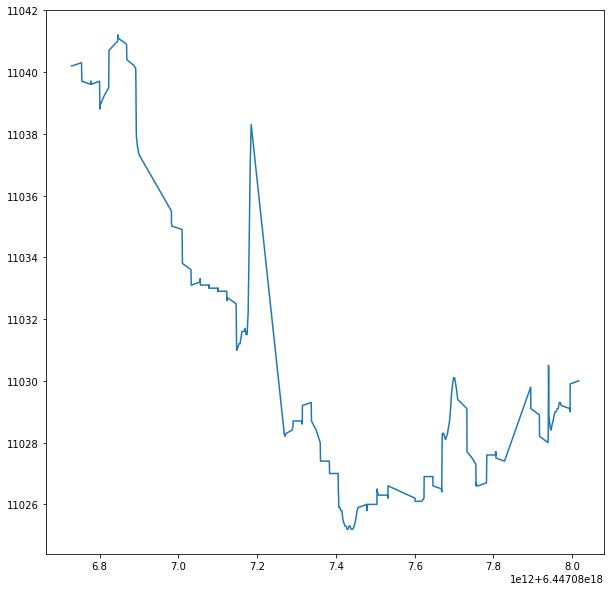

In [8]:
fig=plt.figure(figsize=(10,10))
plt.plot(truedata['measurement_time'],truedata['thermistor'])
plt.show()
#truedata['trans']
#truedata['measurement_time']